# Hypothesis: 
A greater number of mass shootings will occur as a result of the shooter suffering from mental illness rather than being motivated by race?


# Questions to explore: 
1. Are there any relationships with attributes of the shooter - age, gender, mental health, race?
2. How frequent are mass shootings occurring in the US - weekly, monthly, annually? 
3. Where and when are mass shootings occurring most? 
4. Is there a correlation between location fatalities vs. injured? 
5. Weapon and shooting type?

# Additional findings: 
* 

In [1]:
import pandas as pd 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline


In [2]:
big_shoot = Path("big_shoot.csv")
big_shoot_df = pd.read_csv(big_shoot)
pd.set_option('display.max_columns', None)

In [3]:
big_shoot_df.head(10)

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Fatalities,Total Number of Victims,Description,Date,Day of Week,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Number of Shotguns,Number of Rifles,Number of Handguns,Total Number of Guns,Number of Automatic Guns,Number of Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,History of Mental Illness - Detailed,History of Mental Illness - General,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,http://en.wikipedia.org/wiki/Charles_Whitman,"Lexington Examiner (KY) - September 23, 2012",http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,"""Slaughter In The College Of Beauty."" Time 88....",Section: Lexington True Crime Examiner,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,http://news.google.com/newspapers?nid=1144&dat...,http://theadvocate.com/home/4828836-125/rampag...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being 

In [4]:
big_shoot_df = big_shoot_df.drop(['CaseID','Data Source 1','Data Source 2','Data Source 3','Data Source 4','Data Source 5','Data Source 6','Data Source 7','Notes','Edit Date'],axis=1)
big_shoot_df.head(10)

,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Fatalities,Total Number of Victims,Description,Date,Day of Week,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Number of Shotguns,Number of Rifles,Number of Handguns,Total Number of Guns,Number of Automatic Guns,Number of Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,History of Mental Illness - Detailed,History of Mental Illness - General,Military Experience,Class,Depreciation
0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,Yes,SPK,1
1,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,Unknown,MS,1
2,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,Unknown,SPK,1
3,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,Unknown,MS,1
4,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,0,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Monday,"Monday, December 30, 1974",Anthony F. Barbaro,1,17,17,Male,White American or European American,Remington .30-06-caliber rifle with telescopic...,Multiple guns,1,1,0,2,0,0,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,School custodian and general public on the street,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No,Unknown,MS,1
5,Los Angeles Computer Learning Center,"Los Angeles, California",Los Angeles,California,34.176221,-118.539954,1,6,1,0,1,8,"On Febr

In [5]:
big_shoot_df = big_shoot_df.dropna()

In [6]:
big_shoot_df.isnull().mean() * 100

Title                                   0.0
Location                                0.0
City                                    0.0
State                                   0.0
Latitude                                0.0
Longitude                               0.0
Number of Civilian Fatalities           0.0
Number of Civilian Injured              0.0
Number of Enforcement Fatalities        0.0
Number of Enforcement Injured           0.0
Total Number of Fatalities              0.0
Total Number of Victims                 0.0
Description                             0.0
Date                                    0.0
Day of Week                             0.0
Date - Detailed                         0.0
Shooter Name                            0.0
Number of shooters                      0.0
Shooter Age(s)                          0.0
Average Shooter Age                     0.0
Shooter Sex                             0.0
Shooter Race                            0.0
Type of Gun - Detailed          

In [7]:
big_shoot_df = big_shoot_df.rename(columns={'Number of Civilian Fatalities':'Civilian Fatalities',
                                            'Number of Civilian Injured':'Civilian Injured',
                                            'Number of Enforcement Fatalities':'Enforcement Fatalities',
                                            'Number of Enforcement Injured':'Enforcement Injured',
                                            'Total Number of Fatalities':'Total Fatalities',
                                            'Total Number of Victims':'Total Victims',
                                            'Day of Week':'Day',
                                            'Number of Shotguns':'Total Shotguns',
                                            'Number of Rifles':'Total Rifles',
                                            'Number of Handguns':'Total Handguns',
                                            'Number of Automatic Guns':'Total Automatic Guns',
                                            'Number of Semi-Automatic Guns':'Total Semi-Automatic Guns',
                                            'Total Number of Guns':'Total Guns Used',
                                            'History of Mental Illness - Detailed':'Mental Illness Details',
                                            'History of Mental Illness - General':'Mental Illness'
                                           })
big_shoot_df.head(10)

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Day,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Military Experience,Class,Depreciation
0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,Yes,SPK,1
1,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,Unknown,MS,1
2,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,Unknown,SPK,1
3,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,Unknown,MS,1
4,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,0,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Monday,"Monday, December 30, 1974",Anthony F. Barbaro,1,17,17,Male,White American or European American,Remington .30-06-caliber rifle with telescopic...,Multiple guns,1,1,0,2,0,0,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,School custodian and general public on the street,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No,Unknown,MS,1
5,Los Angeles Computer Learning Center,"Los Angeles, California",Los Angeles,California,34.176221,-118.539954,1,6,1,0,1,8,"On February 19, 1976, a 18-year-old student at...",2/19/1976,Thursday,"Thursday, February 19, 1976",Neil Jordan Liebeskind,1,18,18,Male

In [8]:
big_shoot_df['Year'] = pd.DatetimeIndex(big_shoot_df['Date']).year
big_shoot_df

,Title,Location,City,State,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Description,Date,Day,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Total Shotguns,Total Rifles,Total Handguns,Total Guns Used,Total Automatic Guns,Total Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Military Experience,Class,Depreciation,Year
0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,Yes,SPK,1,1966
1,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,Unknown,MS,1,1966
2,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,Unknown,SPK,1,1972
3,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,Unknown,MS,1,1974
4,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,0,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Monday,"Monday, December 30, 1974",Anthony F. Barbaro,1,17,17,Male,White American or European American,Remington .30-06-caliber rifle with telescopic...,Multiple guns,1,1,0,2,0,0,Custody,Custody,Not applicable,Yes,Secondary school,Place of schooling,School custodian and general public on the street,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No,Unknown,MS,1,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Fort Warne drive by,"Fort Wayne, Ind

### Visualising the dataset
Shootings tend to occur most in the middle (Wednesdays), followed by Fridays and Mondays. 

The number of shootings across the years were steadily increasing however in 2015 and 2016, there was an unexpected increase in the number of shooting occurences. In these two recent years, we also saw the highest number of fatalities as a result of the shooting. 

Shootings are also occuring most in the state of California, with a total of 35 shootings over the years whilst states like Iowa, South Dakota and Maine have the least number of shootings in the past 5-6 decades.

Residential Homes and Neighbourhoods are where shootings are also taking place the most and secondary schools and cafes or restaurants have the least number of occurences.

<AxesSubplot:xlabel='Day'>

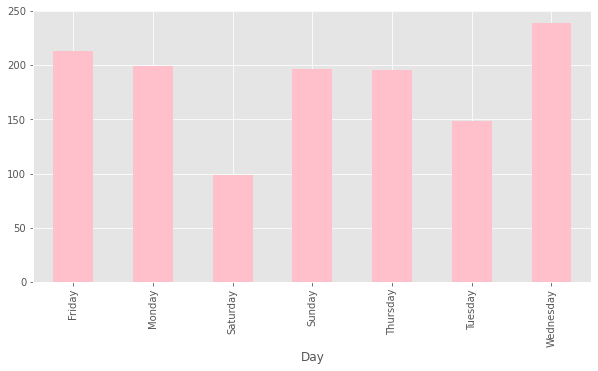

In [26]:
# Frequency of fatalities during the week
fatality_day = big_shoot_df.groupby('Day')['Total Fatalities'].sum()
fatality_day.plot(kind='bar',x='Day',y='Total Fatalities',figsize=(10,5),color='pink') 

### Explore 2015 and 2016 further 
- Why did the number of shootings suddenly increase so high? Did most shooters have a mental illness? 
- Did most shootings that occur in these two years, also happen to take place in the top 3 states where most shootings occurred (California, Florida, Texas)?

<AxesSubplot:title={'center':'Total Shootings per Year'}>

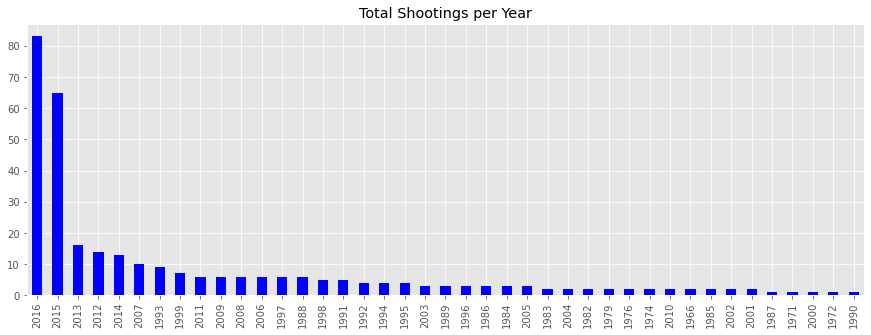

In [10]:
# Frequency fatalities per year
fatality_year = big_shoot_df['Year'].value_counts()
fatality_year.plot(kind='bar',figsize=(15,5),color='blue', title='Total Shootings per Year')

<AxesSubplot:xlabel='Year'>

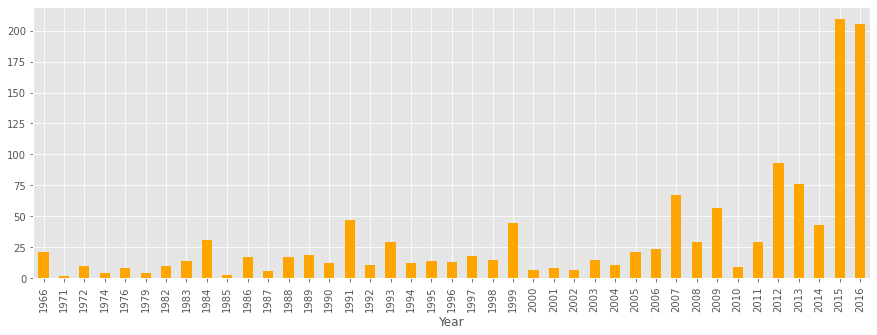

In [11]:
# Frequency of Fatalities per Year
state_by_year = big_shoot_df.groupby('Year')['Total Fatalities'].sum()
state_by_year.plot(kind='bar',figsize=(15,5),color='orange')

<AxesSubplot:>

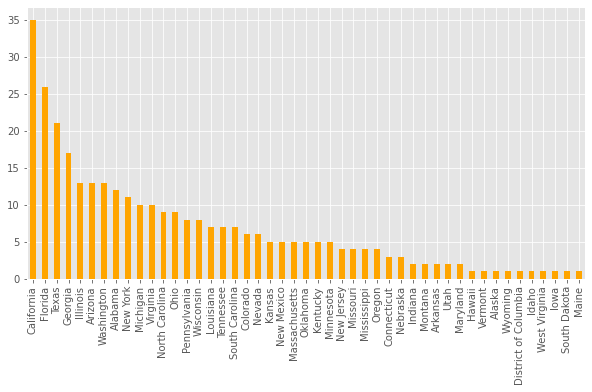

In [12]:
# Frequency of shootings per State
state = big_shoot_df['State'].value_counts()
state.plot(kind='bar',figsize=(10,5),color='orange')

<AxesSubplot:>

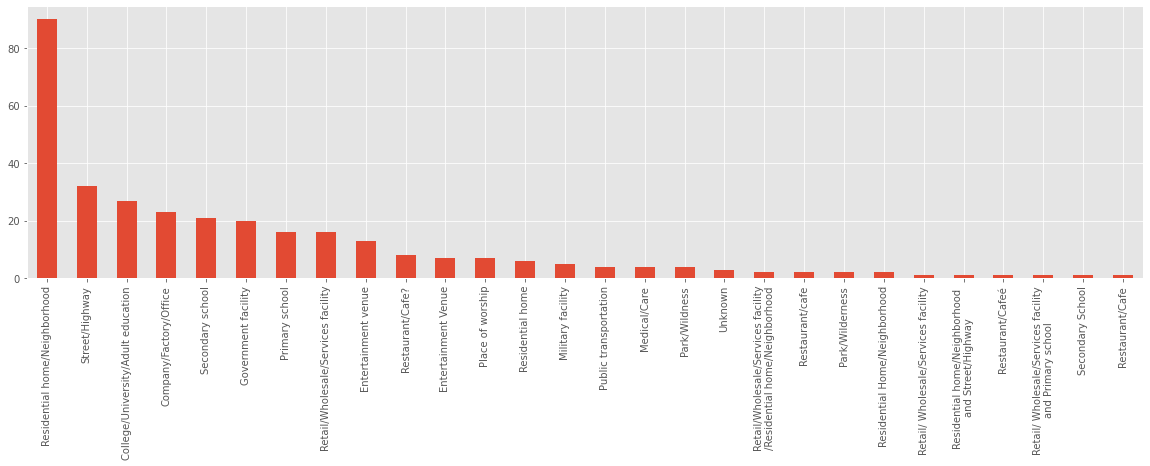

In [13]:
place = big_shoot_df['Place Type'].value_counts()
place.plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

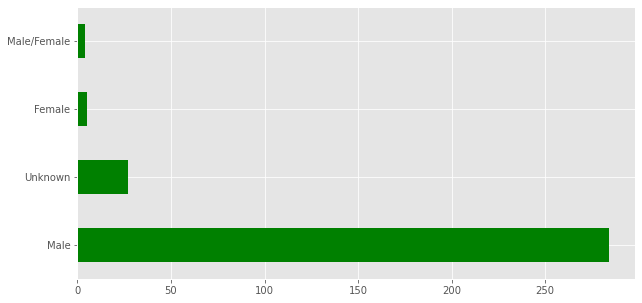

In [35]:
gender = big_shoot_df['Shooter Sex'].value_counts()
gender.plot(kind='barh',figsize=(10,5),color='green')

<AxesSubplot:>

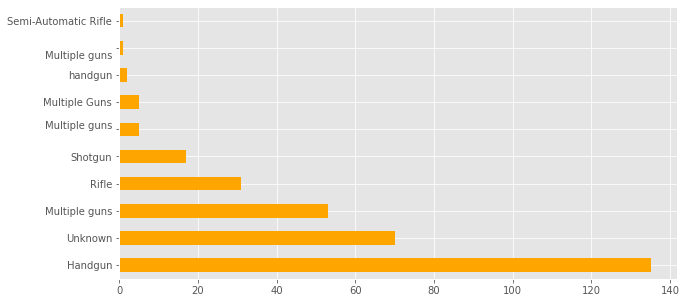

In [25]:
gun_type = big_shoot_df['Type of Gun - General'].value_counts()
gun_type.plot(kind='barh',figsize=(10,5),color='orange')

<AxesSubplot:>

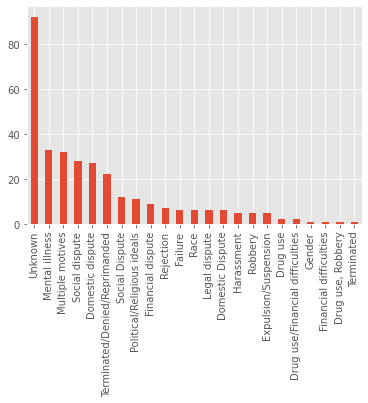

In [38]:
motive = big_shoot_df['Possible Motive - General'].value_counts()
motive.plot(kind='bar')

### Analysing the Correlation between variables
There is a high positive correlation between the number of victims, fatalities and injuries indicating that the higher the number of victims involved, the higher the number of fatalities and injuries and vice versa. 

In [39]:
big_shoot_corr = big_shoot_df.corr()
big_shoot_corr

,Latitude,Longitude,Civilian Fatalities,Civilian Injured,Enforcement Fatalities,Enforcement Injured,Total Fatalities,Total Victims,Depreciation,Year
Latitude,1.000000,-0.112118,-0.036092,-0.071853,-0.013266,-0.110404,-0.023718,-0.072369,0.027341,-0.049029
Longitude,-0.112118,1.000000,-0.033560,-0.058744,-0.066121,-0.039530,-0.048993,-0.061157,0.014416,0.136133
Civilian Fatalities,-0.036092,-0.033560,1.000000,0.473065,-0.022872,-0.015401,0.987311,0.801986,-0.010263,-0.154218
Civilian Injured,-0.071853,-0.058744,0.473065,1.000000,0.024813,-0.021544,0.456666,0.900223,-0.006528,-0.172860
Enforcement Fatalities,-0.013266,-0.066121,-0.022872,0.024813,1.000000,0.438996,0.078224,0.074686,-0.003111,-0.168212
Enforcement Injured,-0.110404,-0.039530,-0.015401,-0.021544,0.438996,1.000000,0.035721,0.053611,-0.004282,-0.075572
Total Fatalities,-0.023718,-0.048993,0.987311,0.456666,0.078224,0.035721,1.000000,0.792299,-0.015558,-0.157251
Total Victims,-0.072369,-0.061157,0.801986,0.900223,0.074686,0.053611,0.792299,1.000000,-0.009754,-0.202474
Depreciation,0.027341,0.014416,-0.010263,-0.006528,-0.003111,-0.004282,-0.015558,-0.009754,1.000000,0.014036
Year,-0.049029,0.136133,-0.154218,-0.172860,-0.168212,-0.075572,-0.157251,-0.202474,0.014036,1.000000


<AxesSubplot:>

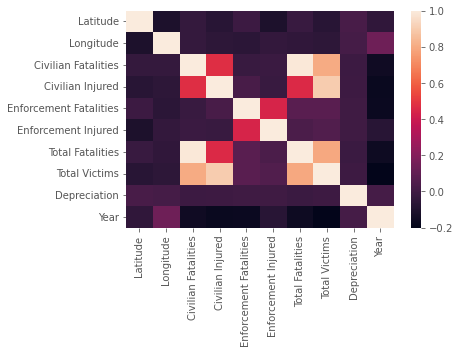

In [40]:
# Create a heatmap from the correlation values
sns.heatmap(big_shoot_corr)

<AxesSubplot:>

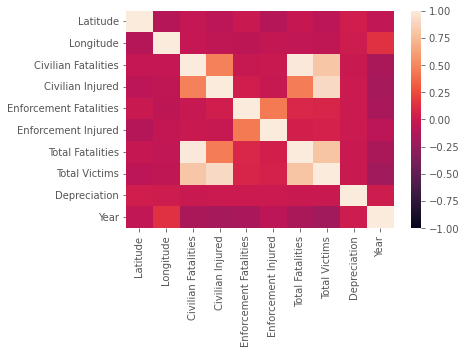

In [41]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(big_shoot_corr, vmin=-1, vmax=1)

### Different Dataset

In [ ]:
mass_shootings = Path("mj_mass_shootings.csv")
shootings_df = pd.read_csv(mass_shootings)
pd.set_option('display.max_columns', None)

In [ ]:
shootings_df = shootings_df.drop(['sources','mental_health_sources','sources_additional_age'],axis=1)
shootings_df.head(10)

In [ ]:
shootings_df_cleaned = shootings_df.replace("-","NULL")
# shootings_df_cleaned.columns = shootings_df_cleaned.columns.str.replace('location.1','location',regex=True)                                                                 
shootings_df_cleaned.head()

In [ ]:
shootings_df_cleaned['location'] = shootings_df_cleaned['location'].str.split(',').str[-1]
shootings_df_cleaned

In [ ]:
fatality_per_year = shootings_df_cleaned.groupby('year')['fatalities'].sum()
fatality_per_year.plot(kind='line',x='year',y='fatalities',figsize=(15,5))    

## Correlation
**Note:** Correlation is only valid for numeric variables

In [ ]:
shootings_df_cleaned_corr = shootings_df_cleaned.corr()
shootings_df_cleaned_corr

## Correlation
The below heatmaps indicate a positive correlation between fatalities and injured.

In [ ]:
# Create a heatmap from the correlation values
sns.heatmap(shootings_df_cleaned_corr)

In [ ]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(shootings_df_cleaned_corr, vmin=-1, vmax=1)

In [ ]:
# Count the frequency of shootings per state 
state_cleaned = shootings_df['location.1'].value_counts()
state_cleaned.plot(kind='pie',figsize=(9,9))

## Diving deeper into shootings in 2017
2017 had the highest number of fatalities and injured. 

In [ ]:
data_2017 = shootings_df_cleaned['year'] == 2017
shootings_df_2017 = shootings_df_cleaned[data_2017]
shootings_df_2017.head()
# age_distribution.plot(kind='line',x=figsize=(10,5),color='red')

In [ ]:
locations_2017 = shootings_df_2017['location.1'].value_counts()
locations_2017

In [ ]:
locations_2017.plot(kind='bar')

In [ ]:
gender = shootings_df_2017['gender'].value_counts()
gender.plot(kind='pie')

In [ ]:
had_illness = shootings_df_2017['prior_signs_mental_health_issues'].value_counts()
had_illness

In [ ]:
shootings_df_2017['location'] = shootings_df_2017['location'].str.split(',').str[-1]
shootings_df_2017

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=shootings_df_2017['longitude'], y=shootings_df_2017['latitude'])
plt.show()

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
geometry = [Point(xy) for xy in zip(shootings_df_2017['longitude'],shootings_df_2017['latitude'])]
geometry[:3]

In [ ]:
crs = {'init':'epsg:4326'}

In [ ]:
geo_df = gpd.GeoDataFrame(shootings_df_2017,crs=crs,geometry=geometry)
geo_df.head()
geo_df = geo_df.replace("NaN",0)
geo_df

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America
ax = world[world.continent == 'South America'].plot(figsize=(30,8))


In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
world.plot(ax=ax, alpha=0.4,color="grey")
# geo_df[geo_df['location'] == 'California'].plot(ax=ax, markersize = 20, color = "blue",marker = "o",label='California')
geo_df[geo_df['location'] == 'Texas'].plot(ax=ax, markersize = 20, color = "red",marker = "^",label='Texas')
# geo_df[geo_df['location'] == 'Colorado'].plot(ax=ax, markersize = 20, color = "blue",marker = "o",label='Colorado')
# geo_df[geo_df['location'] == 'Maryland'].plot(ax=ax, markersize = 20, color = "blue",marker = "^",label='Maryland')
geo_df[geo_df['location'] == 'Nevada'].plot(ax=ax, markersize = 20, color = "blue",marker = "o",label='Nevada')
plt.legend(prop={'size':15})